# LSTM（Long Short-Term Memory）
リカレントニューラルネットワーク（RNN）の一種  
長期的な依存関係を捉えることができるモデル   
「忘却ゲート」「入力ゲート」「出力ゲート」の3つのゲートを持つことで、時間的に長く続く依存関係を効率よく学習することができる
## 特徴
ゲート機構: LSTMは、入力、出力、忘却のゲートを通じて情報を選択的に更新・保持・忘却することができ、これによって過去の情報を長期間保持できる。  
勾配消失問題の回避: 通常のRNNは勾配消失問題（long-term dependenciesの学習困難）が生じやすいが、LSTMはこの問題を克服する。
## 用途
特に時系列予測や自然言語処理（NLP）など、順序依存性のあるデータを扱う場合に非常に効果的  
## モデルの構成
複数のLSTMセルが並んだネットワークで構成され、入力層、LSTM層、出力層が順番に処理する


In [13]:
import torch
import torch.nn as nn

# LSTMモデル定義
class SimpleLSTM(nn.Module):
    def __init__(self):
        super(SimpleLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=10, batch_first=True)
        self.fc = nn.Linear(10, 1)  # 最終出力は1つ

    def forward(self, x):
        x, _ = self.lstm(x)  # LSTMの出力
        return self.fc(x[:, -1, :])  # 最後の時間ステップの出力を使用

Epoch 10, Loss: 0.2903
Epoch 20, Loss: 0.1539
Epoch 30, Loss: 0.0981
Epoch 40, Loss: 0.0602
Epoch 50, Loss: 0.0274
Epoch 60, Loss: 0.0042
Epoch 70, Loss: 0.0028
Epoch 80, Loss: 0.0006
Epoch 90, Loss: 0.0006
Epoch 100, Loss: 0.0004


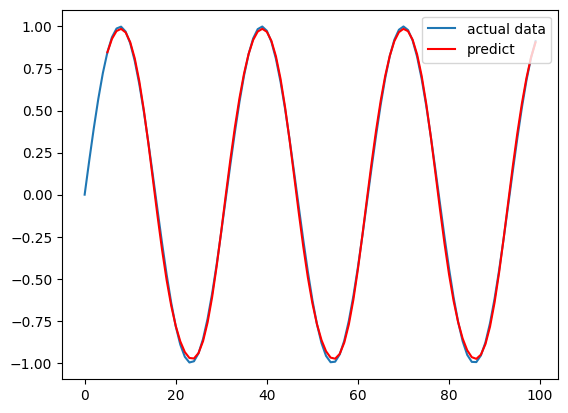

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# サンプルデータ（サイン波）
np.random.seed(42)
data = np.sin(np.linspace(0, 20, 100))  # サイン波（100ステップ）
data = torch.tensor(data, dtype=torch.float32).view(-1, 1)  # PyTorchテンソル化

# 訓練データの作成
def create_dataset(data, time_step=5):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])  # 入力
        Y.append(data[i + time_step])    # 予測値
    return torch.stack(X), torch.stack(Y)

time_step = 5
X, Y = create_dataset(data, time_step)

# モデルの作成
model = SimpleLSTM()
criterion = nn.MSELoss()  # 損失関数
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # 最適化関数

# 学習ループ
for epoch in range(100):
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, Y)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

# 予測
model.eval()
predicted = model(X).detach().numpy()

# 結果のプロット
plt.plot(data.numpy(), label='actual data')
plt.plot(range(time_step, len(predicted) + time_step), predicted, label='predict', color='red')
plt.legend()
plt.show()

